# First run

In this first run we will select some variables based on my intuition:


### Exploration

In [1]:
'''import os
os.getcwd()
os.chdir('C:/Anacond')
'''

"import os\nos.getcwd()\nos.chdir('C:/Anacond')\n"

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')

data = pd.read_csv('Data Science Bootcamp Data_2.0.csv')
data = data.rename(columns=lambda x: x.strip())   
data.shape

(42653, 152)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42653 entries, 0 to 42652
Columns: 152 entries, Quest No to ChangeReasons
dtypes: float64(89), object(63)
memory usage: 49.5+ MB


In [4]:
recoded_Age = {'Age': {'21-30':25.5, '31-35':33, '36-40':38, '41-60':50.5, 'Above 60':65, 'No Response': None}}
data.replace(recoded_Age, inplace=True)
data.loc[data['Age'] == '18-20', 'Age'] = 19

print(data.Age.value_counts())
data[['Age']].info()

25.5    16503
33.0     9277
38.0     5734
50.5     5010
19.0     4471
65.0     1398
Name: Age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42653 entries, 0 to 42652
Data columns (total 1 columns):
Age    42393 non-null object
dtypes: object(1)
memory usage: 333.3+ KB


In [5]:
recoded_Gender = {'Gender': {'Male':0, 'Female':1, 'No Response':None}}
data.replace(recoded_Gender, inplace=True)

In [6]:
recoded_Income = {'Income': {'N50,000 - N100,000':75000, 'Below N50,000':25000, 'N101,000 - N250,000':175000,
                             'N251,000 - N500,000':375000, 'N501,000 - N1 Million':750000, 'No Response': None, 'Greater than N1 million':2000000}}
data.replace(recoded_Income, inplace=True)
data.Income.value_counts()

25000.0      19042
75000.0      13415
175000.0      5995
375000.0      1881
750000.0       697
2000000.0      270
Name: Income, dtype: int64

In [7]:
recoded_FreqBra = {'FreqBra': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqBra, inplace=True)

recoded_FreqATM = {'FreqATM': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqATM, inplace=True)

recoded_FreqPOS = {'FreqPOS': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqPOS, inplace=True)

recoded_FreqInt = {'FreqInt': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqInt, inplace=True)

recoded_FreqMob = {'FreqMob': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqMob, inplace=True)

recoded_FreqUSSD = {'FreqUSSD': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqUSSD, inplace=True)

recoded_FreqTel = {'FreqTel': {'Never':0, 'Rarely':0.5, 'Monthly':2, 'At least once a week':6, 
                               'At Least once a day':30, 'No Response': None}}
data.replace(recoded_FreqTel, inplace=True)

We will skip Bank from variables in the clustering analysis. When the analysis is done, we will see the banks that each cluster belongs to

We will also skip Devices used in mobile banking in this first run

In [8]:
selected_data = data[['Age', 'Gender', 'Income', 'No of Years', 'FreqBra', 'FreqATM', 'FreqPOS', 'FreqInt', 
                      'FreqMob', 'FreqUSSD', 'FreqTel']]

In [9]:
demographic = data.iloc[:,:10]
banking_rel_reasons = data.iloc[:,10:16]
bank_chann_usage = data.iloc[:,16:23]
most_freq_ATM = data.iloc[:,23:24]
reas_for_freq_ATM = data.iloc[:,24:28]
dev_used_onl_banking = data.iloc[:,28:32]
bank_activ_engaged = data.iloc[:,32:41]
bank_activ_will_like = data.iloc[:,41:50]

# Customer Experience
cust_care = data.iloc[:,50:58]
complaints = data.iloc[:,58:62]
branches = data.iloc[:,62:74]
ATMs = data.iloc[:,74:82]
mob_banking = data.iloc[:,82:94]
int_banking = data.iloc[:,94:106]
call_centre = data.iloc[:,106:112]
soc_media = data.iloc[:,112:116]
cards = data.iloc[:,116:124]
exec_eff = data.iloc[:,124:128]
prod = data.iloc[:,128:132]
ease_credit = data.iloc[:, 132:136]
val_for_money = data.iloc[:,136:138]

# Payments
pay_settl_wit_cash = data.iloc[:,138:141]
pay_settl_wo_cash = data.iloc[:,141:144]
pay_will_like_cashless = data.iloc[:,144:147]

#Loyalty
bank_recommendation = data.iloc[:,147:148]
bank_switch_plan = data.iloc[:,148:149]
from_bank = data.iloc[:,149:150]
to_bank = data.iloc[:,150:151]
reason_for_switch = data.iloc[:,151:152]

In [10]:
null_rows = reas_for_freq_ATM.index[reas_for_freq_ATM.isnull().all(1)]
null_rows

Int64Index([    2,     3,     5,    12,    15,    16,    18,    19,    32,
               33,
            ...
            42599, 42600, 42601, 42611, 42612, 42613, 42614, 42615, 42617,
            42618],
           dtype='int64', length=6849)

Decision to discard this reasons for freq ATM due to judgement of analyst

In [11]:
null_rows = dev_used_onl_banking.index[dev_used_onl_banking.isnull().all(1)]
null_rows

Int64Index([    0,     1,     2,     3,     5,    12,    18,    19,    28,
               32,
            ...
            42618, 42630, 42635, 42636, 42637, 42638, 42644, 42645, 42646,
            42647],
           dtype='int64', length=20914)

In [12]:
dev_used_onl_banking.describe()
dev_per_person = np.sum(dev_used_onl_banking =='Yes', axis=1)
dev_per_person.describe()

count    42653.000000
mean         0.517431
std          0.517496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
dtype: float64

(array([ 20914.,      0.,  21454.,      0.,      0.,    248.,      0.,
            28.,      0.,      9.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

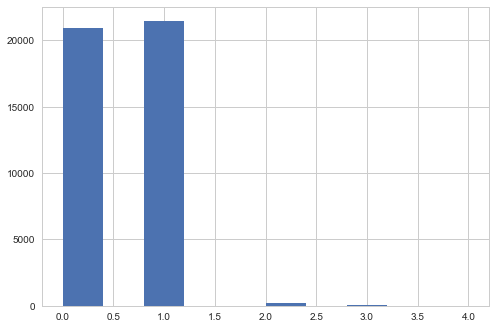

In [13]:
plt.hist(dev_per_person)

There are a lot of nulls for devices used in online banking, but it is a safe assumption that blanks mean that no device is used for online banking given the poor distribution of literacy in Nigeria

bank_activ_engaged will be ignored for now. Each of the columns represent an activity and the value in each role is the primary channel used to execute such activity. Initial idea was to get some count of the channel usage and use that rather than the activity itself, but this is already mostly covered by bank_chann_usage. It might be interesting to see which activities are carried out be each cluster. 

bank_activ_will_like too will be ignored for now. It might be interesting still to see the activites the various clusters will like

#### Customer  Experience (Customer Care, Complaints, Branches, etc)

We will shift the data (all ratings by -4 so that neutral is zero)

We will multiply the importance by the rating for each criteron and get a single score for each subsection

In [14]:
cust_care.columns

Index(['impcc1a', 'cc1a', 'impcc1b', 'cc1b', 'impcc2', 'cc2', 'impcc3', 'cc3'], dtype='object')

In [15]:
cust_care.iloc[:,1::2] -=  4
cust_care_score = np.sum(cust_care.iloc[:,0::2].values * cust_care.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['cust_care_score'] = cust_care_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
complaints.iloc[:,1::2] -=  4
complaints_score = np.sum(complaints.iloc[:,0::2].values * complaints.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['complaints_score'] = complaints_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
branches.iloc[:,1::2] -=  4
branches_score = np.sum(branches.iloc[:,0::2].values * branches.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['branches_score'] = branches_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
ATMs.iloc[:,1::2] -=  4
ATMs_score = np.sum(ATMs.iloc[:,0::2].values * ATMs.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['ATMs_score'] = ATMs_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
mob_banking.iloc[:,1::2] -=  4
mob_banking_score = np.sum(mob_banking.iloc[:,0::2].values * mob_banking.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['mob_banking_score'] = mob_banking_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
int_banking.iloc[:,1::2] -=  4
int_banking_score = np.sum(int_banking.iloc[:,0::2].values * int_banking.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['int_banking_score'] = int_banking_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
call_centre.iloc[:,1::2] -=  4
call_centre_score = np.sum(call_centre.iloc[:,0::2].values * call_centre.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['call_centre_score'] = call_centre_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
soc_media.iloc[:,1::2] -=  4
soc_media_score = np.sum(soc_media.iloc[:,0::2].values * soc_media.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['soc_media_score'] = soc_media_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
exec_eff.iloc[:,1::2] -=  4
exec_eff_score = np.sum(exec_eff.iloc[:,0::2].values * exec_eff.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['exec_eff_score'] = exec_eff_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
prod.iloc[:,1::2] -=  4
prod_score = np.sum(prod.iloc[:,0::2].values * prod.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['prod_score'] = prod_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
ease_credit.iloc[:,1::2] -=  4
ease_credit_score = np.sum(ease_credit.iloc[:,0::2].values * ease_credit.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['ease_credit_score'] = ease_credit_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
val_for_money.iloc[:,1::2] -=  4
val_for_money_score = np.sum(val_for_money.iloc[:,0::2].values * val_for_money.iloc[:,1::2].values, axis=1)
# multiplying the two dfs did not do element-wise multiplication
selected_data['val_for_money_score'] = val_for_money_score

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
selected_data.iloc[:,:12].describe()

,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score
count,40563.000000,4.130000e+04,41386.000000,39959.000000,41920.000000,38561.000000,38777.000000,39087.000000,38074.000000,37902.000000,36376.000000
mean,0.463674,1.041023e+05,6.113227,3.919530,8.071601,2.237222,3.031784,4.146340,3.417398,0.674872,37.379783
std,0.498685,1.943508e+05,4.801078,6.208846,8.936301,5.406533,7.305842,8.445696,8.012664,3.215450,34.889540
min,0.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000
25%,0.000000,2.500000e+04,3.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,7.500000e+04,5.000000,2.000000,6.000000,0.500000,0.000000,0.500000,0.000000,0.000000,36.000000
75%,1.000000,7.500000e+04,8.000000,6.000000,6.000000,2.000000,2.000000,6.000000,2.000000,0.500000,59.000000
max,1.000000,2.000000e+06,55.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,120.000000


In [28]:
selected_data.iloc[:,12:].describe()

,complaints_score,branches_score,ATMs_score,mob_banking_score,int_banking_score,call_centre_score,soc_media_score,exec_eff_score,prod_score,ease_credit_score,val_for_money_score
count,38715.000000,36379.000000,37488.000000,18273.000000,15255.000000,12197.000000,16054.000000,36873.000000,33922.000000,16312.000000,34050.000000
mean,18.487460,47.700844,41.328612,57.427078,53.598558,21.823071,14.457830,22.800586,16.738488,13.658718,8.499912
std,20.967451,49.480791,38.653564,53.043930,53.399985,27.993780,18.809495,20.036471,20.210425,20.573956,12.549324
min,-60.000000,-180.000000,-120.000000,-180.000000,-180.000000,-90.000000,-60.000000,-60.000000,-60.000000,-60.000000,-30.000000
25%,7.000000,18.000000,19.000000,23.000000,17.000000,0.000000,0.000000,11.000000,5.000000,0.000000,0.000000
50%,19.000000,46.000000,40.000000,54.000000,50.000000,20.000000,12.000000,20.000000,17.000000,12.000000,10.000000
75%,32.000000,78.000000,69.000000,90.000000,88.000000,39.000000,26.000000,36.000000,30.000000,27.000000,18.000000
max,60.000000,180.000000,120.000000,180.000000,180.000000,90.000000,60.000000,60.000000,70.000000,81.000000,30.000000


We will drop the features with counts less than 30,000

And use a different strategy for imputation. We will use drop instead of median

In [29]:
selected_data.drop(['mob_banking_score', 'int_banking_score', 'call_centre_score', 'soc_media_score', 'ease_credit_score'], axis=1,
                  inplace=True)

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
selected_data.dropna(inplace=True)

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
selected_data.describe()

,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score,complaints_score,branches_score,ATMs_score,exec_eff_score,prod_score,val_for_money_score
count,17267.000000,1.726700e+04,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000,17267.000000
mean,0.454509,1.035472e+05,6.205971,3.681589,7.940146,2.050269,2.989054,3.919210,3.142932,0.534951,39.047258,19.050443,49.194475,42.551862,23.067470,17.478022,8.808189
std,0.497941,1.903558e+05,4.826077,5.804428,8.577025,4.858608,7.189457,8.035219,7.573814,2.431920,34.045565,20.377463,48.997465,37.781910,19.961634,19.524966,12.074081
min,0.000000,2.500000e+04,1.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.000000,-60.000000,-180.000000,-120.000000,-60.000000,-60.000000,-30.000000
25%,0.000000,2.500000e+04,3.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,8.000000,19.000000,20.000000,12.000000,6.000000,0.000000
50%,0.000000,7.500000e+04,5.000000,2.000000,6.000000,0.500000,0.500000,0.500000,0.000000,0.000000,37.000000,19.000000,47.000000,40.000000,20.000000,18.000000,10.000000
75%,1.000000,7.500000e+04,8.000000,6.000000,6.000000,2.000000,2.000000,6.000000,2.000000,0.500000,60.000000,32.000000,79.000000,70.000000,37.000000,30.000000,18.000000
max,1.000000,2.000000e+06,55.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,120.000000,60.000000,180.000000,120.000000,60.000000,70.000000,30.000000


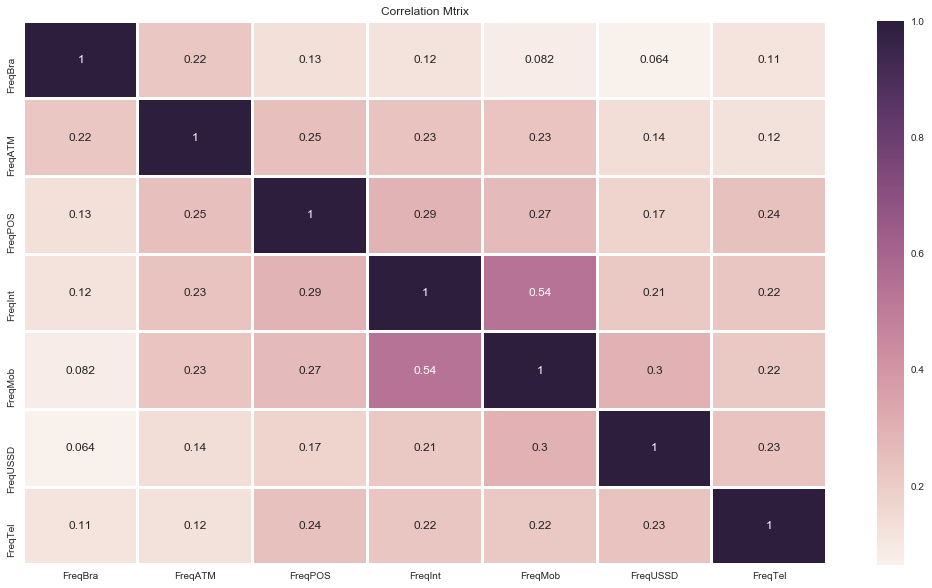

In [32]:
corr_matrix = bank_chann_usage.corr()

f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix,linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Mtrix')

## Clustering

In [33]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(selected_data)

selected_data_std = std_scaler.transform(selected_data)
selected_data_std_df = pd.DataFrame(selected_data_std, columns = selected_data.columns)

(array([ 2875.,  3449.,     0.,  1434.,     0.,  1940.,   101.,     0.,
          642.,  6826.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

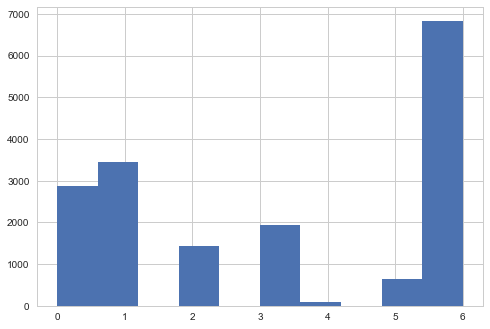

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(selected_data_std)

import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(kmeans.labels_)

In [35]:
cluster_df_std = pd.DataFrame(kmeans.cluster_centers_, columns=selected_data.columns)
cluster_df_std

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score,complaints_score,branches_score,ATMs_score,exec_eff_score,prod_score,val_for_money_score
0,-0.098235,0.005789,-0.058151,-0.148521,-0.179572,-0.049777,0.021189,-0.155354,-0.060203,0.041360,-0.063145,1.189715,1.088804,1.199961,1.064533,1.029658,1.122799,1.005747
1,-0.200099,0.005987,-0.173596,-0.164623,-0.185537,-0.066373,-0.148675,-0.229869,-0.247962,-0.125690,-0.072344,-0.953853,-1.001550,-0.997699,-0.939778,-0.932198,-0.984739,-0.913577
2,-0.143142,-0.062694,0.130653,-0.104526,-0.068350,0.790857,0.858099,2.254034,2.267963,0.511120,0.027351,-0.240819,-0.142925,-0.198019,-0.185305,-0.238601,-0.215318,-0.273768
3,1.782344,-0.063484,0.819780,1.649868,-0.137110,-0.175068,-0.079663,-0.225881,-0.267162,-0.131707,-0.063149,0.174230,0.123161,0.059397,0.063611,0.128543,0.116280,0.143818
4,0.051699,0.061535,0.410485,-0.247842,1.426333,1.067868,2.619542,2.262187,1.865801,2.144062,12.116314,0.056777,0.142807,0.243171,0.036758,0.022413,-0.020934,-0.030036
5,0.249765,-0.105717,0.677941,0.081261,4.534327,0.701639,0.386718,0.245808,0.264103,0.298265,0.083306,0.215205,0.141693,0.221938,0.140741,0.141450,0.187489,0.218819
6,-0.358155,0.034806,-0.217971,-0.305086,-0.224900,-0.143783,-0.166573,-0.284403,-0.302390,-0.083584,-0.111807,-0.037900,0.028425,0.000279,0.034840,0.038591,0.020860,0.035773


In [36]:
cluster_df = pd.DataFrame(std_scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_data.columns)
cluster_df.to_csv('PCA after clustering.csv')
cluster_df

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score,complaints_score,branches_score,ATMs_score,exec_eff_score,prod_score,val_for_money_score
0,31.332696,0.457391,92478.260870,5.489217,2.639304,7.513217,2.153217,1.872174,3.435478,3.456174,0.381391,79.550609,41.236870,107.987826,82.770783,43.620522,39.400000,20.951304
1,30.253759,0.457490,70503.181029,5.411510,2.604685,7.370879,1.327935,1.336466,1.926836,2.191006,0.359023,6.573742,-1.358010,0.311163,7.046270,4.459803,-1.748409,-2.222094
2,30.857043,0.423291,128417.015342,5.701534,3.284868,14.723152,6.219317,19.193863,22.142259,7.013947,0.601464,30.848675,16.138075,39.492329,35.550907,18.304742,13.274059,5.502789
3,51.251676,0.422898,259592.573491,14.168128,2.885766,6.438628,1.663228,1.365137,1.772563,2.145436,0.381382,44.978855,21.560083,52.104693,44.955132,25.633316,19.748324,10.544611
4,32.920792,0.485149,181683.168317,5.009901,11.960396,17.099010,14.777228,19.252475,18.910891,19.381188,30.000000,40.980198,21.960396,61.108911,43.940594,23.514851,17.069307,8.445545
5,35.018692,0.401869,232593.457944,6.598131,30.000000,13.957944,3.929128,4.756231,6.041277,5.401869,0.737539,46.373832,21.937695,60.068536,47.869159,25.890966,21.138629,11.450156
6,28.579642,0.471839,62056.321502,4.733646,2.376210,6.706952,1.240980,0.944412,1.489513,2.509900,0.263054,37.756967,19.629657,49.208126,43.868143,23.837782,17.885304,9.240100


In [37]:
selected_data_with_banks = selected_data.iloc[:]   # make a copy
selected_data_with_banks['cluster'] = kmeans.labels_
selected_data_with_banks['Bank'] = data['Bank']
selected_data_with_banks.head()

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score,complaints_score,branches_score,ATMs_score,exec_eff_score,prod_score,val_for_money_score,cluster,Bank
4,25.5,0.0,25000.0,5.0,2.0,6.0,0.5,0.5,0.5,0.5,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Bank C
5,25.5,0.0,25000.0,8.0,2.0,6.0,0.5,0.0,0.0,0.0,0.5,24.0,20.0,48.0,32.0,16.0,0.0,8.0,6,Bank D
22,19,1.0,25000.0,4.0,6.0,30.0,0.5,0.5,0.5,0.5,2.0,110.0,50.0,160.0,90.0,50.0,50.0,20.0,0,Bank A
24,25.5,1.0,25000.0,5.0,0.5,6.0,0.5,0.5,0.5,6.0,0.0,12.0,22.0,-12.0,74.0,40.0,0.0,0.0,6,Bank C
32,25.5,1.0,25000.0,5.0,2.0,6.0,0.5,0.0,0.0,0.0,0.0,40.0,10.0,58.0,-9.0,20.0,20.0,0.0,6,Bank O


In [48]:
selected_data_with_banks.shape

(17267, 20)

#### Count of Clusters

In [57]:
pd.Series(kmeans.labels_).value_counts(normalize
                                       =True)

6    0.395321
1    0.199745
0    0.166503
3    0.112353
2    0.083049
5    0.037181
4    0.005849
dtype: float64

#### Analysis of Banks for Each Cluster

In [38]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 0, 'Bank'].value_counts(normalize=True)

Bank C    0.199298
Bank B    0.110175
Bank H    0.104912
Bank D    0.094737
Bank A    0.076842
Bank N    0.075439
Bank G    0.058947
Bank L    0.050175
Bank J    0.046667
Bank F    0.034386
Bank O    0.029123
Bank K    0.026316
Bank E    0.026316
Bank Q    0.021053
Bank P    0.017895
Bank I    0.016140
Bank M    0.011579
Name: Bank, dtype: float64

In [39]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 1, 'Bank'].value_counts(normalize=True)

Bank B    0.143942
Bank C    0.128175
Bank A    0.117956
Bank D    0.110073
Bank L    0.097518
Bank H    0.090511
Bank F    0.056058
Bank G    0.046131
Bank J    0.042044
Bank N    0.031825
Bank E    0.030949
Bank I    0.022190
Bank K    0.020730
Bank O    0.018102
Bank Q    0.017518
Bank M    0.014015
Bank P    0.012263
Name: Bank, dtype: float64

In [40]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 2, 'Bank'].value_counts(normalize=True)

Bank C    0.163509
Bank B    0.140351
Bank H    0.115789
Bank D    0.112982
Bank A    0.091930
Bank N    0.066667
Bank L    0.061053
Bank J    0.037895
Bank G    0.037193
Bank F    0.029474
Bank M    0.026667
Bank K    0.023860
Bank O    0.021053
Bank I    0.020351
Bank E    0.019649
Bank P    0.016140
Bank Q    0.015439
Name: Bank, dtype: float64

In [41]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 3, 'Bank'].value_counts(normalize=True)

Bank B    0.239875
Bank A    0.135514
Bank C    0.093458
Bank I    0.074766
Bank N    0.074247
Bank H    0.062305
Bank L    0.049844
Bank D    0.049325
Bank F    0.048806
Bank J    0.041018
Bank O    0.034787
Bank G    0.022326
Bank K    0.019211
Bank M    0.018692
Bank Q    0.017134
Bank E    0.010903
Bank P    0.007788
Name: Bank, dtype: float64

In [42]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 4, 'Bank'].value_counts(normalize=True)

Bank C    0.195876
Bank A    0.113402
Bank H    0.113402
Bank D    0.103093
Bank B    0.092784
Bank N    0.072165
Bank L    0.061856
Bank J    0.061856
Bank F    0.051546
Bank G    0.030928
Bank E    0.030928
Bank Q    0.020619
Bank O    0.020619
Bank M    0.010309
Bank P    0.010309
Bank I    0.010309
Name: Bank, dtype: float64

In [43]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 5, 'Bank'].value_counts(normalize=True)

Bank B    0.172684
Bank C    0.133438
Bank A    0.100471
Bank D    0.097331
Bank H    0.089482
Bank N    0.073783
Bank L    0.058085
Bank F    0.056515
Bank J    0.043956
Bank G    0.037677
Bank K    0.028257
Bank I    0.023548
Bank Q    0.023548
Bank E    0.021978
Bank O    0.018838
Bank P    0.012559
Bank M    0.007849
Name: Bank, dtype: float64

In [44]:
selected_data_with_banks.loc[selected_data_with_banks['cluster'] == 6, 'Bank'].value_counts(normalize=True)

Bank C    0.175952
Bank B    0.127738
Bank D    0.102749
Bank A    0.099956
Bank H    0.095399
Bank N    0.062766
Bank G    0.052918
Bank L    0.049978
Bank J    0.047332
Bank F    0.045421
Bank E    0.026753
Bank K    0.026018
Bank I    0.019991
Bank O    0.019844
Bank Q    0.018521
Bank P    0.018080
Bank M    0.010584
Name: Bank, dtype: float64

#### Summary histograms of selected data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE3FF3CCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE400BF940>]], dtype=object)

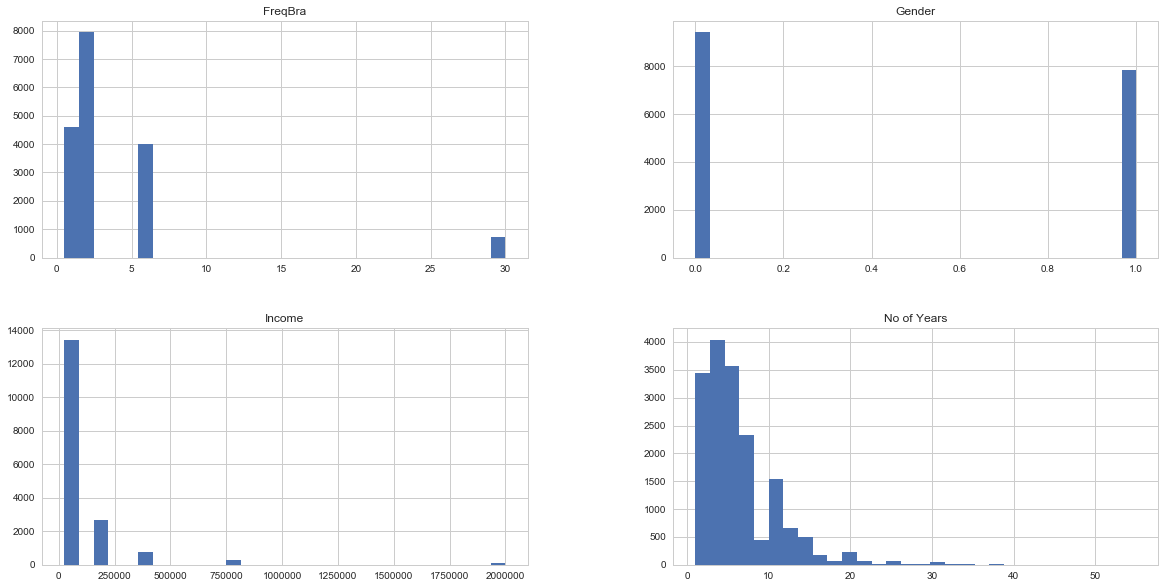

In [45]:
selected_data_with_banks.iloc[:,:5].hist(bins=30, figsize=[20, 10])
#plt.savefig('Hist1.png', dpi=3000, format='png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE40357CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE405AA940>]], dtype=object)

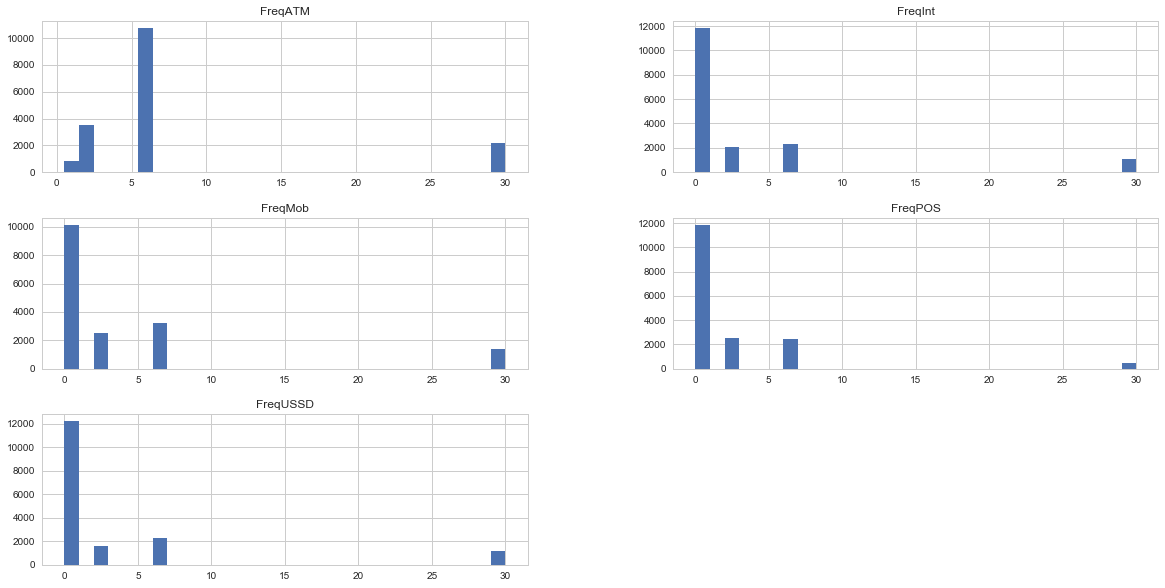

In [46]:
selected_data_with_banks.iloc[:,5:10].hist(bins=30, figsize=[20, 10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE414940B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE4187B668>]], dtype=object)

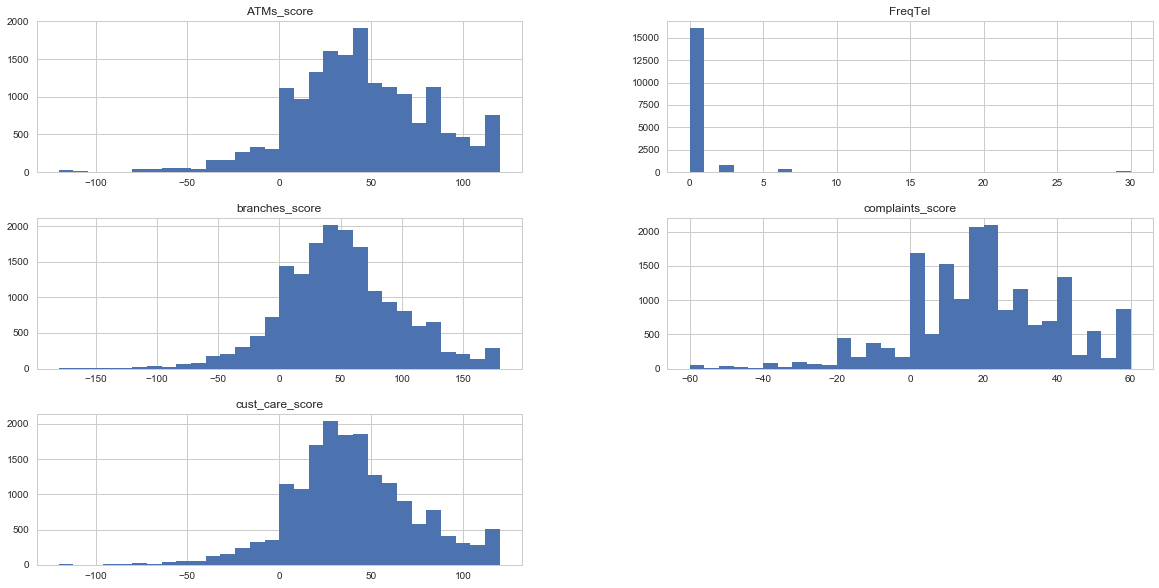

In [47]:
selected_data_with_banks.iloc[:,10:15].hist(bins=30, figsize=[20, 10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE423C70B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE427B9DA0>]], dtype=object)

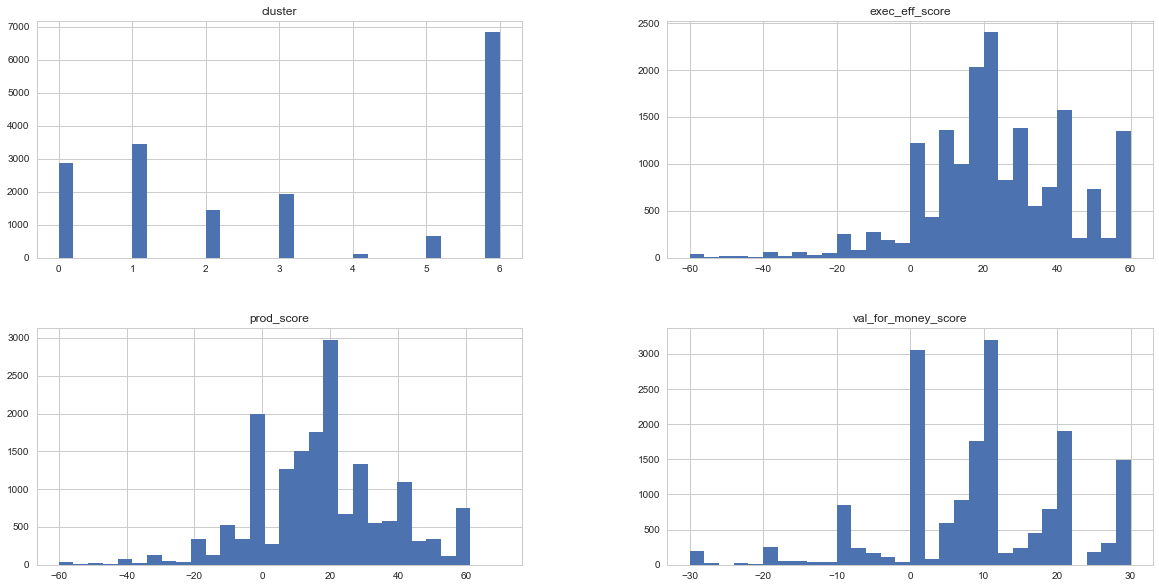

In [51]:
selected_data_with_banks.iloc[:,15:].hist(bins=30, figsize=[20, 10])

## PCA and Visualization

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(selected_data_std)
pca.components_
X = pd.DataFrame(pca.components_, columns = selected_data.columns)
X.head()

,Age,Gender,Income,No of Years,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,cust_care_score,complaints_score,branches_score,ATMs_score,exec_eff_score,prod_score,val_for_money_score
0,-0.066733,0.003786,-0.060536,-0.040303,-0.033301,-0.002897,-0.039658,0.004165,-0.021776,-0.048647,-0.017162,-0.390029,-0.374610,-0.398867,-0.366870,-0.363132,-0.381503,-0.347631
1,0.046252,-0.069350,0.188128,0.028271,0.255230,0.338434,0.397196,0.451353,0.459178,0.305537,0.322743,-0.010254,-0.012576,-0.008111,-0.020124,-0.042693,-0.039564,-0.056683
2,0.638830,-0.081607,0.412348,0.600346,0.098649,-0.054093,-0.032114,-0.084083,-0.111436,-0.101510,-0.028457,-0.001755,-0.029616,-0.062385,-0.061930,-0.024778,-0.030744,-0.018239
3,-0.115539,-0.257468,0.113171,-0.192914,0.674269,0.434477,0.010398,-0.320788,-0.294349,-0.174819,-0.050517,-0.008638,-0.041880,0.009148,-0.007707,-0.000352,0.000202,0.046793
4,0.024033,0.891937,0.010938,0.015228,0.215102,0.004775,0.147921,-0.112880,-0.185875,-0.051525,0.287598,0.005843,0.004399,0.015799,0.004600,-0.041191,-0.025533,0.003984


In [199]:
pca.explained_variance_ratio_

array([ 0.22836663,  0.12791783,  0.09833147,  0.05761267,  0.05566123,
        0.05114725,  0.04630545,  0.04430855,  0.0440074 ,  0.04260376,
        0.03696586])

In [210]:
print('Selected data has', len(selected_data.columns), 'features')
print('11 principal components has', np.sum(pca.explained_variance_ratio_), 'total variance explanation')

Selected data has 18 features
11 principal components has 0.83322810991 total variance explanation


In [200]:
selected_data_std_pca = pca.transform(selected_data_std)
selected_data_std_pca = pd.DataFrame(selected_data_std_pca, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11'])
selected_data_std_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,2.477496,-0.684724,-0.317795,0.331547,-0.835968,0.339197,0.231652,0.263345,-0.086281,-0.014955,-0.066203
1,0.862604,-0.790042,-0.105548,0.245458,-0.751238,0.365378,0.401415,0.462083,-0.398483,0.010112,0.019472
2,-4.054132,0.096758,-1.704274,1.528326,1.261695,-1.015390,-0.037311,0.594179,-0.812862,0.694452,1.625585
3,0.842839,-0.801025,-0.767931,-0.546953,0.787615,0.032256,-0.710908,0.001365,0.049571,0.372746,0.175498
4,0.982826,-1.003241,-0.592981,-0.145457,0.933239,-0.254969,-0.006011,-0.020754,0.069502,0.045700,0.025756


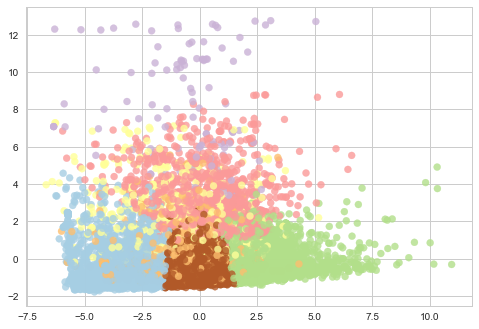

In [201]:
plt.scatter(selected_data_std_pca['pca1'], selected_data_std_pca['pca2'], c=kmeans.labels_, cmap='Paired', alpha=0.8)
#plt.legend(['1', '2', '3', '4', '5', '6'])

PCA not really working for separating the clusters

C:\Users\EshamogboOjuba\.conda\envs\my_root\lib\site-packages\matplotlib\collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


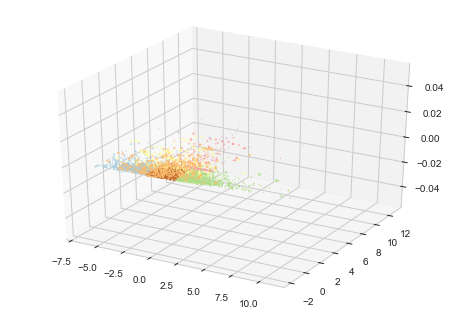

In [202]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(selected_data_std_pca['pca1'], selected_data_std_pca['pca2'], selected_data_std_pca['pca3'], c=kmeans.labels_, cmap='Paired')

## t-SNE

In [203]:
np.random.seed(9)
selected_data_std_rd = np.random.permutation(selected_data_std)

In [204]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, n_iter=300)
tsne_result = tsne.fit_transform(selected_data_std_rd[:5000])

time_elapsed = time.time() - time_start
time_elapsed


97.92933559417725

In [205]:
tsne_result.shape

(5000, 2)

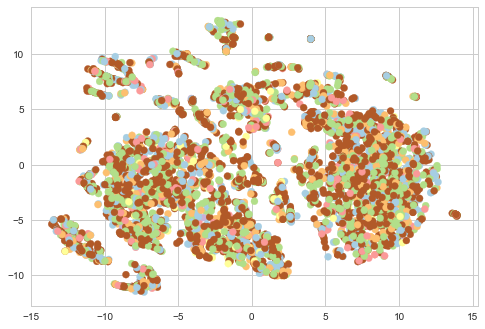

In [206]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans.labels_[:5000], cmap='Paired')